# Marketing Mix Model with Python

The goal of the project is to solve the marketing attribution problem.It aims to predict how much each marketing channel is
contributed to the sales of the business.The problem becomes complex when the market channels are offline channels like TV,radio.

### Importing neccessary package libraries

In [229]:
# Import the required packages

import numpy as np
import pandas as pd

# Importing the packages for visualization 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
import statsmodels.formula.api as sm
from matplotlib.pyplot import figure


### Defining class for data loading

In [230]:
class dataImport:
    def __init__(self, file): 
        ''' This class is created to import and load the original data file and split into training and test data
        in the ratio of 80:20 
    
        This class accepts input the original dataset and output file would test and train file'''
        self.file= file
        self.process_data()
        
        
    def process_data(self):
        self._data_import()
        self._split_train_test(self.df)
        
        
    def _data_import(self):
        ''' This function is used to load the data'''    
        self.df=self._load_csv(file)
        print('Data is loaded successfully')
        print('-----------------------------------------------------------------------')
        
    def _load_csv(self,file):
        ''' The function will load the csv file into a dataframe'''
        return pd.read_csv(file)
    
    def _split_train_test(self,df):
        ''' This function will split the dataframe into train and test files'''    
        train, test = train_test_split(df, test_size=0.2)
        self.train=train
        self.test=test
        print("Successfully splitted training and test data in 80:20 ratio")
        print('-----------------------------------------------------------------------')
        
        
        

In [231]:
class prepocess_EDA:
    def __init__(self,data):
        ''' This class is used to explore more about the data and handle the outliers and preprocess data'''
        self.data=data
        self.train=data.train
        self.test=data.test
        self._clean_data()
        self._explore_()
        self._correlation_analysis()
        self._explore_cols()
        
    def _clean_data(self):
        '''This function elimnates the default column which has row number which is not needed'''
        self.train=self.train.copy().drop(['Unnamed: 0'],axis=1)
        self.test=self.test.copy().drop(['Unnamed: 0'],axis=1)
        print('Data is cleaned by removing unncessary columns')
    
    def _explore_(self):
        '''This function describes about the columns present in the data and snippet of actual data'''
        print('Columns in the dataframe are :')
        print(self.train.columns)
        print('--------------------------------')
        self.train.describe()
        
    def _correlation_analysis(self):
        '''This function provides the correlation analysis '''
        corr = self.train.corr()
        #fig = plt.figure(figsize=(12,6))
        sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
        plt.tight_layout()
        plt.title('Correlation Matrix', fontsize=12)
        plt.xticks(rotation=45)
        
    def _explore_cols(self):
        '''This function  plots the relationship between the dependent and independent variables'''
                 
        sns.pairplot(self.train)       
         
        
        

             

### Feature Selection

In [232]:
class feaure_select:
    def __init__(self,data):
        ''' This class is used to explore more about the data and handle the outliers and preprocess data'''
        self.data=data
        self.train=data.train
        self.test=data.test
        self.set_vars()
        self.rand_frst_model()
        self.feature_select()
        
        
    def set_vars(self):
        self.train=self.train.copy().drop(['Unnamed: 0'],axis=1)
        self.X_train = self.train.loc[:, self.train.columns != 'sales']
        self.y_train = self.train['sales']
    
    def rand_frst_model(self):
        self.model = RandomForestRegressor(random_state=1)
        self.model.fit(self.X_train, self.y_train)
        pred = self.model.predict(self.X_train)
        
    def feature_select(self):
        self.feat_importances = pd.Series(self.model.feature_importances_, index=self.X_train.columns)
        self.feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))    
        

### Development of Regression Model

In [257]:
class model_build:
    def __init__(self,data):
        ''' This class is used to explore more about the data and handle the outliers and preprocess data'''
        self.data=data
        self.train=data.train
        self.test=data.test
        self.model_bld()
        
        
    def model_bld(self):
        self.model = sm.ols(formula="sales~TV+radio+newspaper", data=self.train).fit()
        print(self.model.summary())

### Evaluating the model

In [267]:
class evaluate:
    def __init__(self,data,model_bld):
        ''' This class is used to evaluate the accuracy of the model using the test data'''
        self.data=data
        self.df=data.df
        self.train=data.train
        self.test=data.test
        self.model=model_bld.model
        self.predict()
        self.predict_plot()
    
    def predict(self):
        '''This class is used to  predict the values in the test data using the trained model'''
        self.full_model = sm.ols(formula="sales~TV+radio+newspaper", data=self.df).fit()
        self.y_pred = self.full_model.predict(self.df)
        self.labels = self.df['sales']
        self.df_temp = pd.DataFrame({'Actual': self.labels, 'Predicted':self.y_pred})
    
    def predict_plot(self):
        ''' This class is used to visualize the plot of actual and predicted values  '''
        figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
        self.y1 = self.df_temp['Actual']
        self.y2 = self.df_temp['Predicted']
        plt.plot(self.y1, label = 'Actual')
        plt.plot(self.y2, label = 'Predicted')
        plt.legend()
        plt.show()
        

In [235]:
file="C:\\Users\\jjosh\\Advertising.csv"

### Importing and splitting of data

In [236]:
data=dataImport(file)

Data is loaded successfully
-----------------------------------------------------------------------
Successfully splitted training and test data in 80:20 ratio
-----------------------------------------------------------------------


### Preprocessing data ,Exploratory data analysis and  Correaltion analysis

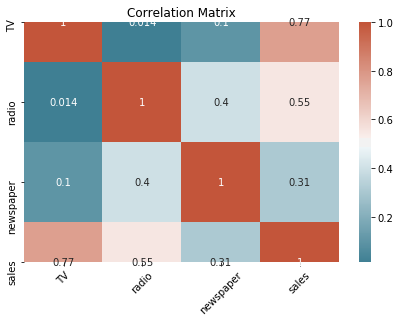

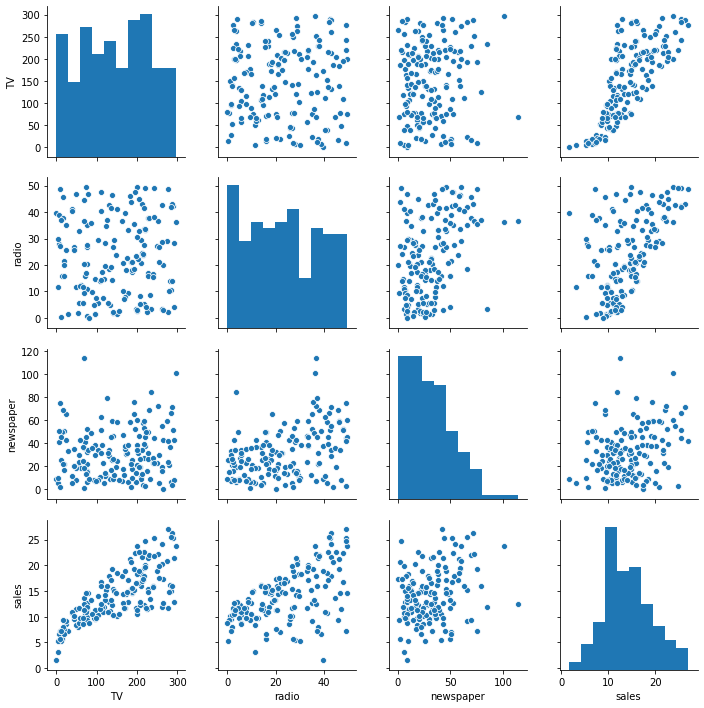

In [237]:
prepocess_EDA(data)

### Importance of Variables

C:\Users\jjosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


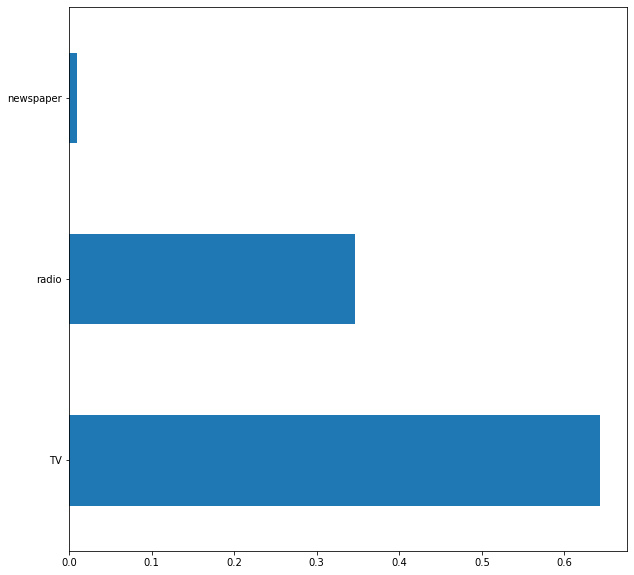

In [238]:
feaure_select(data)

### Building Linear regression model

In [239]:
model_bld=model_build(data)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     409.5
Date:                Tue, 26 May 2020   Prob (F-statistic):           1.05e-73
Time:                        18:47:00   Log-Likelihood:                -312.83
No. Observations:                 160   AIC:                             633.7
Df Residuals:                     156   BIC:                             646.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7254      0.365      7.476      0.0

### Comparing the actual and predicted values

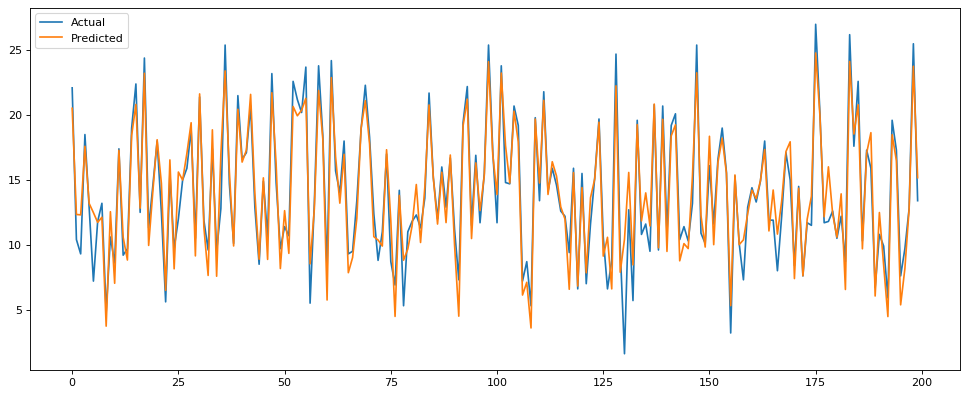

In [268]:
evaluate(data,model_bld)